# **Wiki Traffic Prediction**<B>
![](data/title_image.png)<B>
* This research conducts the timeseries prediction against the Wikipedia traffic so that the resources will be planned in advance based on the predicted number of visitors<b>
* ARIMA, auto-SARIMA, SARIMA, Prophet and linear regression were used for the analysis
* The dataset contains 145063 rows and 551 columns
* The columns contain the "Page" column and 550 columns that represent each date from July 15, 2015, to December 31, 2016
* 'Page' contains information such as subdirectories, subdomains, device types to access, and ways to access  
* The subdomains represent 7 different languages: English, Japanese, Spanish, Chinese, German, Russia, French
* The subdirectories represent indivisual Wikipedia page

In [1]:
import os
#cwd = os.getcwd()
#cwd = '/content/drive/MyDrive/4_wiki_traffic_prediction'
cwd = 'G:/My Drive/4_wiki_traffic_prediction'
os.chdir(cwd)

In [2]:
#### Import the libraries needed
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

# **Load data**
* web_traffic_data.csv contains 551 columns: 'Page' and the rest of 550 columns representing dates from 2015 July 15 to 2016 December 31, and  105063 rows
* The 'Page' column is set as an index
* web_traffic_data.csv contains total of 6,192,931 null values

In [5]:
# Load a dataset as df_wiki
df_wiki = pd.read_csv("data/web_traffic_data.csv")
# Set 'Page' as an index
df_wiki = df_wiki.set_index('Page')
df_wiki.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-0

# **Basic Statistics**

* After 'Page' was set as index, df_wiki has 145,063 rows and 550 columns
* The dataset contains 6,192,931 null values, which is 7.76% of the dataset

In [6]:
num_row = df_wiki.shape[0]
num_column = df_wiki.shape[1]
print(f"Number of Rows: {num_row:,}")
print(f"Number of Columns: {num_column:,}")

Number of Rows: 145,063
Number of Columns: 550


In [7]:
# Get the total number of null values
total_num_null = df_wiki.isnull().sum().sum()
print(f"Number of Null: {total_num_null:,}")

# Get the overall null rate
total_num_values = num_row * num_column
null_rate = round(total_num_null * 100 / total_num_values, 2) 
print(f"Null Rate: {null_rate:,.2f}%")

Number of Null: 6,192,931
Null Rate: 7.76%


In [8]:
df_wiki.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-0

In [9]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145063 entries, 2NE1_zh.wikipedia.org_all-access_spider to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Columns: 550 entries, 2015-07-01 to 2016-12-31
dtypes: float64(550)
memory usage: 609.8+ MB


# **Missing Value Analysis**
* 652, 0.45% 'Page' have all null values, thus remove those rows 
* For the rest, replace NaN with 0 

In [10]:
df = df_wiki.copy()

In [11]:
# Get the number of null by Site
num_null_by_site = df_wiki.isnull().sum(axis=1)

In [12]:
# Get basic statistics of the number of missing values by site
print(f"median{num_null_by_site.median():>11}")
print(num_null_by_site.describe())

median        0.0
count    145063.000000
mean         42.691320
std         115.804572
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         550.000000
dtype: float64


In [13]:
# Check the number of missing values and ratio
num_site_no_null = len(num_null_by_site[num_null_by_site.values == 0])
num_site_all_null = len(num_null_by_site[num_null_by_site.values == num_column])
# num_site_contain_null = len(df_wiki) - num_site_no_null - num_site_all_null

print(f"{num_site_no_null:,} sites have no null")
print(f"Missing Value Ratio: {num_site_no_null/len(df_wiki):.2%}\n")
print(f"{num_site_all_null:,} sites have only null") # --> Removed the entire row
print(f"Missing Value Ratio: {num_site_all_null/len(df_wiki):.2%}\n")
# print(f"{num_site_contain_null:,} sites contains some null")
# print(f"Missing Value Ratio: {num_site_contain_null/len(df_wiki):.2%}")

117,277 sites have no null
Missing Value Ratio: 80.85%

652 sites have only null
Missing Value Ratio: 0.45%



In [14]:
# Remove 652 sites that contain all null values
# ind holds False if the site contains all NaN  
ind = [num != num_column for num in num_null_by_site]
# Extract sites that have values other than NaN
df_wiki = df_wiki.loc[ind]

In [15]:
# Replace Nan with 0
df_wiki.fillna(0, inplace=True)

In [16]:
# Check the null values
print(f"Number of NaN in df: {df_wiki.isna().sum().sum()}")

Number of NaN in df: 0


In [17]:
# df_wiki.index --> 'Page', df_wiki.columns --> ['2015-07-01', '2015-07-02', '2015-07-03',..., '2016-12-30', '2016-12-31']
df_index_date = df_wiki.copy().T
df_index_page = df_wiki.copy()

# **Exploratory Data Analysis**
## **Visualization**
* Total Access is 104,499,219,352  
* Average Daily Access is 189,998,580.64  
* The number of daily access is below the average until January 2016  
* The average access by the day of the week is 14,928,459,907.43
* Wednesday, Tuesday, Sunday, and Monday total access was above the average
* "Main_Page_en.wikipedia.org_all-access_all-agents" is the most accessed site out of 145063 sites that have 194,491,245  access or 0.19% of the entire access
* There are 9 subdomains: 'en', 'ja', 'de', 'fr', 'zh', 'ru', 'es', 'commons', and 'www'
* The average access by subdomain is 16,118.11
* Access of subdomains: 'en', 'ja', 'de', 'fr', and 'zh' are above the average access
*  In July 2016, English and Russian sites increased access suddenly

In [18]:
# Convert the index to Pandas datetime
df_index_date.index = pd.to_datetime(df_index_date.index)
df_index_date.index.freq = 'D'

In [19]:
# Get the daily average
daily_total = df_index_date.sum(axis=1)
total = daily_total.sum()
daily_avg = total / len(df_index_date)
print(f"Total Access: {total:,}\nAverage Daily Access: {daily_avg:,}")

Total Access: 104,499,219,352.0
Average Daily Access: 189,998,580.64


In [20]:
# Create a df, df_access_summary
df_index_date['daily_total'] = daily_total

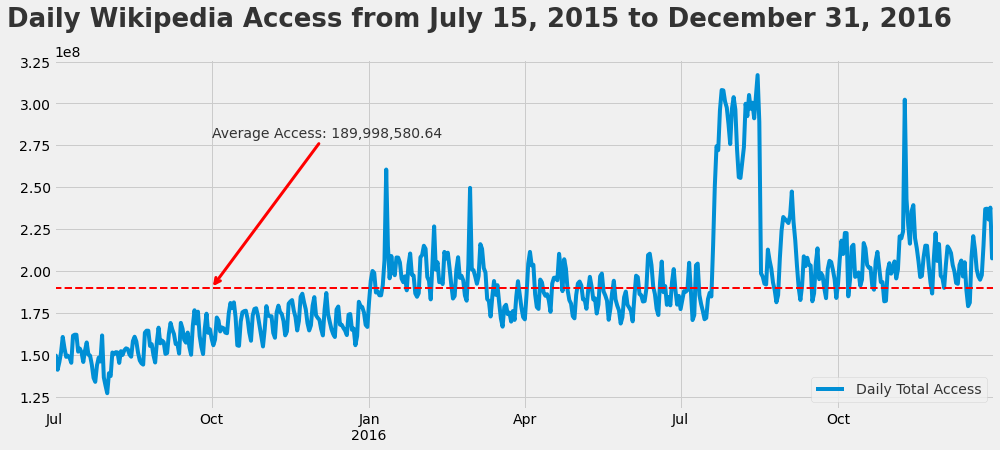

In [21]:
# Plot daily traffic
fig, ax = plt.subplots(figsize=(15, 6))

plt.text(-0.05, 1.15, "Daily Wikipedia Access from July 15, 2015 to December 31, 2016", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plt.annotate(f"Average Access: {daily_avg:,.2f}", ('2015-10-01', daily_avg), ('2015-10-01', 2.8e8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', ec='red', lw=3))

daily_total.plot(ax=ax, label='Daily Total Access')
ax.axhline(daily_avg, ls='--', lw=2, color='r')
plt.legend(loc='lower right');

In [22]:
# Convert '%Y-%m-%d' to the %Y-%m format
year_month = [t.strftime("%Y-%m") for t in df_index_date.index]
df_index_date['year_month'] = year_month

In [23]:
# Get monthly total
# Create monthly_total dataframe with 'year_month' and 'daily_total' columns
monthly_total = df_index_date.iloc[:, -2:].groupby('year_month')['daily_total'].sum()
monthly_avg = round(total / len(monthly_total), 2)

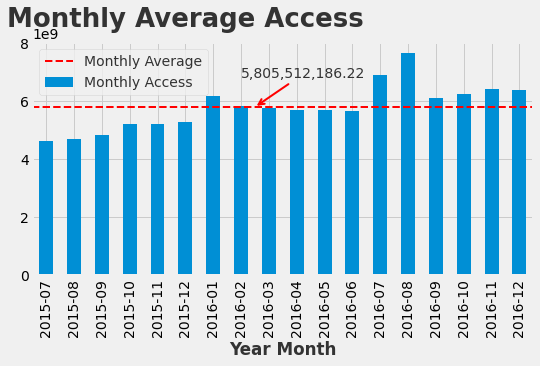

In [24]:
# Plot monthly access
fig, ax = plt.subplots(figsize=(8, 4))

plt.text(-0.05, 1.15, "Monthly Average Access", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plt.annotate(f"{monthly_avg:,.2f}", (7.5, monthly_avg), (7, monthly_avg+1000000000),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', ec='red', lw=2))
monthly_total.plot(ax=ax, label='Monthly Access', kind='bar')
ax.axhline(monthly_avg, ls='--', lw=2, color='r', label='Monthly Average')
plt.xlabel("Year Month")
plt.legend();

In [25]:
# Check the number of accesses for each day of the week

# Add 'week_names' to df
week_names = [d.day_name() for d in df_index_date.index.to_series()]
df_index_date['week_names'] = week_names

In [26]:
gropu_by_weekname = df_index_date.groupby('week_names')['daily_total'].sum().sort_values(ascending=False)
week_avg = round(total / len(gropu_by_weekname), 2)

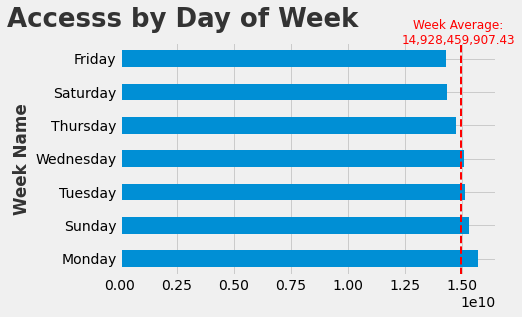

In [27]:
# Plot monthly access
fig, ax = plt.subplots(figsize=(6, 4))

plt.text(-0.3, 1.15, "Accesss by Day of Week", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plt.text(0.9, 1.1, f"Week Average:\n{week_avg:,.2f}", ha='center', va='top', transform=ax.transAxes, fontsize=12, color='r')

gropu_by_weekname.plot(ax=ax, kind='barh')
ax.axvline(week_avg, ls='--', lw=2, color='r', label='Week Average')
plt.ylabel("Week Name");

In [28]:
# Get total by 'Page'
site_total = df_index_page.sum(axis=1)
site_avg = round(total / len(site_total), 2)

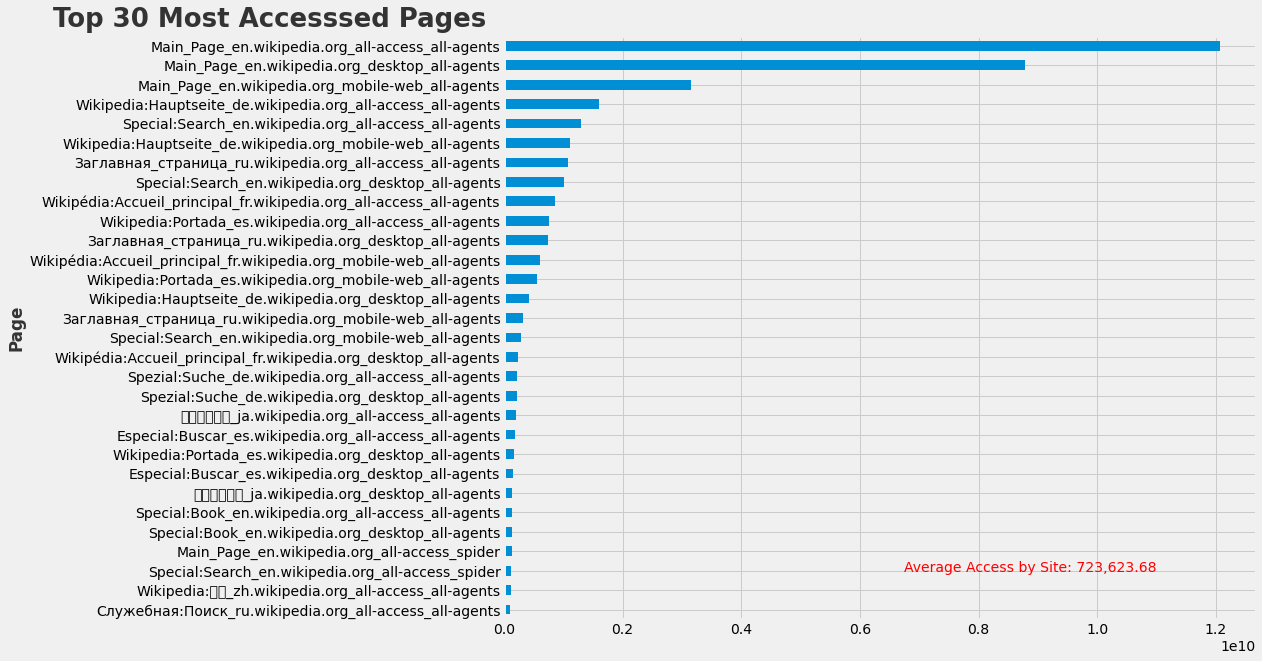

In [29]:
#Plot the top 20 sites that have the total number access 
fig, ax= plt.subplots(figsize=(12, 10))

plt.text(-.6, 1.05, "Top 30 Most Accesssed Pages", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plt.text(0.7, 0.1, f"Average Access by Site: {site_avg:,.2f}", ha='center', va='top', transform=ax.transAxes, fontsize=14, color='r')
site_total.sort_values(ascending=False)[:30].sort_values().plot(ax=ax, kind='barh')
plt.ylabel("Page");

# **Feature Engineering**
* Disect the values in 'Page' into the directory, subdomain, devices, and access methods
* Check the total access by pages
* Check the number of pages by subdomain, evices and access

In [30]:
import re

# Check the site subdomain of the Wikipedia URLs
sites = df_index_page.index.to_list() # Extract only URLs
# Entire URL such as ru.wikipedia.org, common.wikimedia.org, mediawiki.org
pattern_url = '[a-zA-Z0-9]+\.wiki[p, m]edia\.org|[a-zA-Z0-9]+\.mediawiki\.org' 
# subdomain such as de, jp, media, www
pattern_device_method = '[a-zA-Z0-9]+\.wiki[p, m]edia\.org_|[a-zA-Z0-9]+\.mediawiki\.org_' 

wiki_url = [] # Store wiki URLs such as www.wikipedia.org
sub_dir = []
devices = []
methods = []

for site in sites:
    url = re.search(pattern_url, site) 
    device_method = re.search(pattern_device_method, site) 
    if url: # If pattern exists in site, return a Match object, otherwise none
        sub_dir.append(site[: url.span()[0]-1])
        wiki_url.append(site[url.span()[0]: url.span()[1]])
    if device_method:
        device = site[device_method.span()[1]:].split('_')[0]
        method = site[device_method.span()[1]:].split('_')[1]
        devices.append(device)
        methods.append(method)

In [33]:
def count_values(elements, element_name):
    """
    Display the number of unique values and Counter object
    :param elements: a list like object
    :param element_name: a name of elements (str)
    return a Counter object
    """
    from collections import Counter

    counter_dict = dict(Counter(elements))
    print(f"{len(counter_dict)} unique values in {element_name}")
    return counter_dict

In [35]:
page_elements = [wiki_url, sub_dir, devices, methods]
page_element_name = ['wiki_url', 'sub_dir', 'devices', 'methods']
counters = []
for i in range(len(page_elements)):
    counter_element = count_values(page_elements[i], page_element_name[i])
    counters.append(counter_element)

9 unique values in wiki_url
48874 unique values in sub_dir
3 unique values in devices
2 unique values in methods


In [36]:
# Function to draw barplot for a given Counter object
def draw_barplot(counter):
    sorted_counter = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    keys = list(sorted_counter.keys())
    values = list(sorted_counter.values())

    bar1 = sns.barplot(keys, values)
    bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45, ha='right');

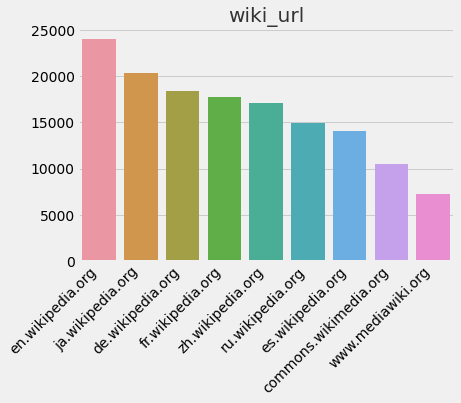

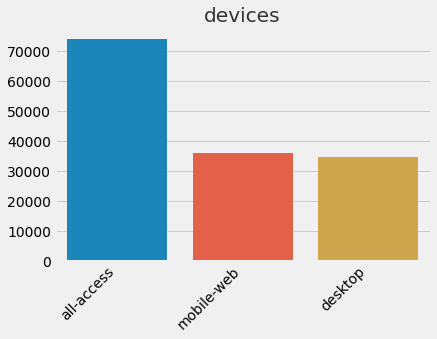

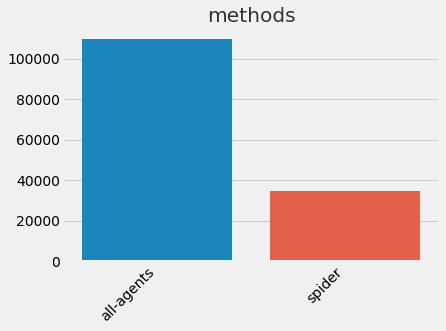

In [37]:
counters_to_plot = [0, 2, 3]
counters_name = ['wiki_url', 'devices', 'methods']

for i in range(len(counters_to_plot)):
    fig = plt.figure(figsize=(6, 4))
    #ax = plt.subplot(1, 3, i+1)
    plt.title(counters_name[i])
    draw_barplot(counters[counters_to_plot[i]]);

### **Check access by subdomain**
* en.wikipedia.org has outstanding number of access all the time.
* en.wikipedia.org has spikes when jp.wikipedia.org and en.wikipedia.org have spikes
* en.wikipedia.org and ru.wikipedia.org has spikes in July 2016
* The main pages of en.wikipedia.org and ru.wikipedia.org outstanding number of access
* The directories related to 'Donald Trump' and 'Hilary Clinton' are included in the top 20 directories from en.wikipedia.org 

In [38]:
# Get daily access by URL
df_index_page['wiki_url'] = wiki_url
daily_access_by_url = df_index_page.groupby('wiki_url').sum()
# Transpose daily_access_by_url
daily_access_by_url_t = daily_access_by_url.T
# Convert the index datatype from str to timestamps
daily_access_by_url_t.index = pd.to_datetime(daily_access_by_url_t.index)

In [39]:
# Get the maximum traffic for each URL
urls = daily_access_by_url_t.columns.to_list()
n={}
for i in range(len(urls)):
    n[urls[i]] = daily_access_by_url_t[urls[i]].max()
# Sort by the traffic in descending order
urls=sorted(n.items(), key=(lambda x: x[1]), reverse=True)

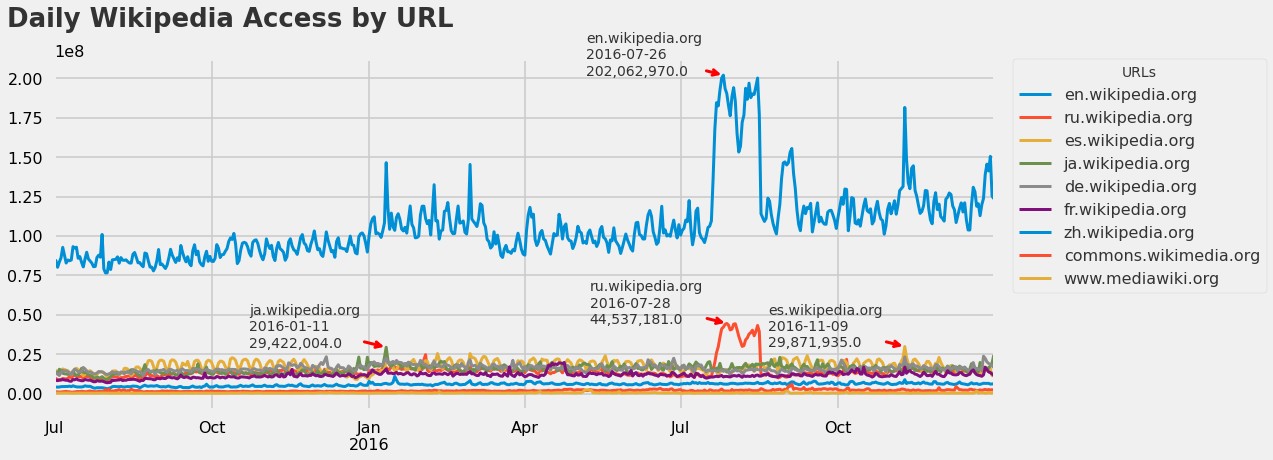

In [40]:
# Plot daily traffic by URL
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(15, 6))

plt.text(-0.05, 1.15, "Daily Wikipedia Access by URL", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')

max_days = [] # Use for later
top_urls = []
for i in range(len(urls)):
    daily_access_by_url_t[urls[i][0]].plot(ax=ax, label=urls[i][0], lw=3)
    # Add annotation for the top 4 
    if i < 4:
        # Get the max daily access
        max_access = urls[i][1]
        # Find the date whose access is equal to max_access and get only date, ex: 2016-07-26
        arrow_position = daily_access_by_url_t[urls[i][0]][daily_access_by_url_t[urls[i][0]] == max_access].index.values[0].astype('datetime64[D]')
        max_days.append(arrow_position)
        top_urls.append(urls[i][0])
        text_position = arrow_position + pd.DateOffset(days=-80)
        plt.annotate(f"{urls[i][0]}\n{arrow_position}\n{max_access:,}", (arrow_position, max_access), (text_position, max_access - 2000 * i),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', ec='red', lw=3))

plt.legend(title='URLs', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [41]:
# Check the top 10 subdirectories of the top traffic days for each URL
#top4_url = ['en.wikipedia.org', 'ru.wikipedia.org', 'es.wikipedia.org', 'ja.wikipedia.org', 'de.wikipedia.org']
days = [d.date().strftime('%Y-%m-%d') for d in pd.to_datetime(max_days)]
topsites = []

for i in range(len(days)):
    sites = df_index_page.loc[:, [days[i], 'wiki_url']]
    sites = sites[sites['wiki_url'] == top_urls[i]]
    sites = sites.sort_values(days[i], ascending=False).head(20)
    topsites.append(sites)

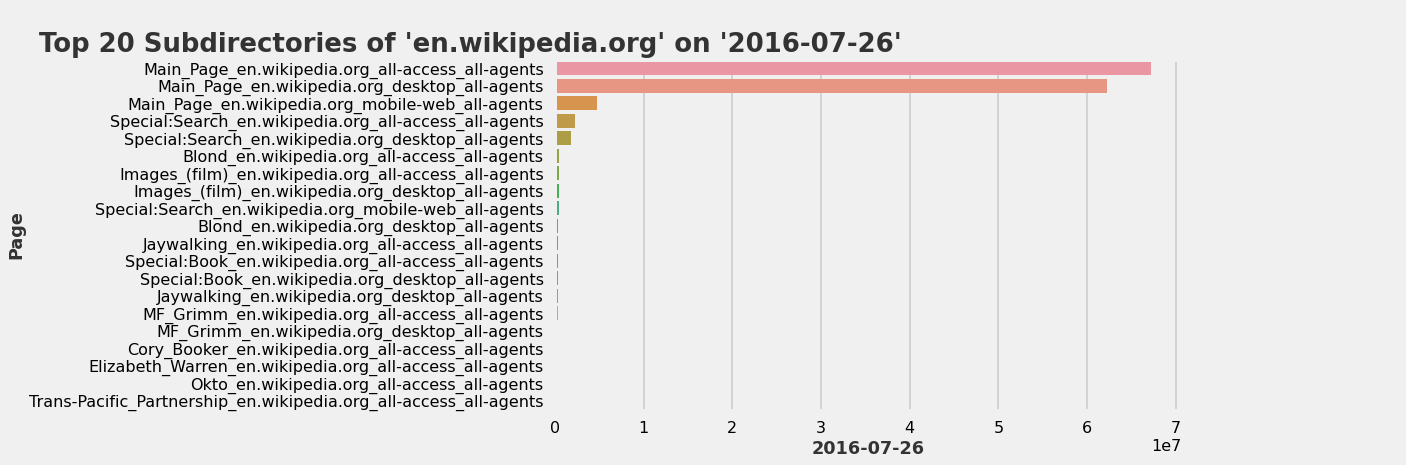

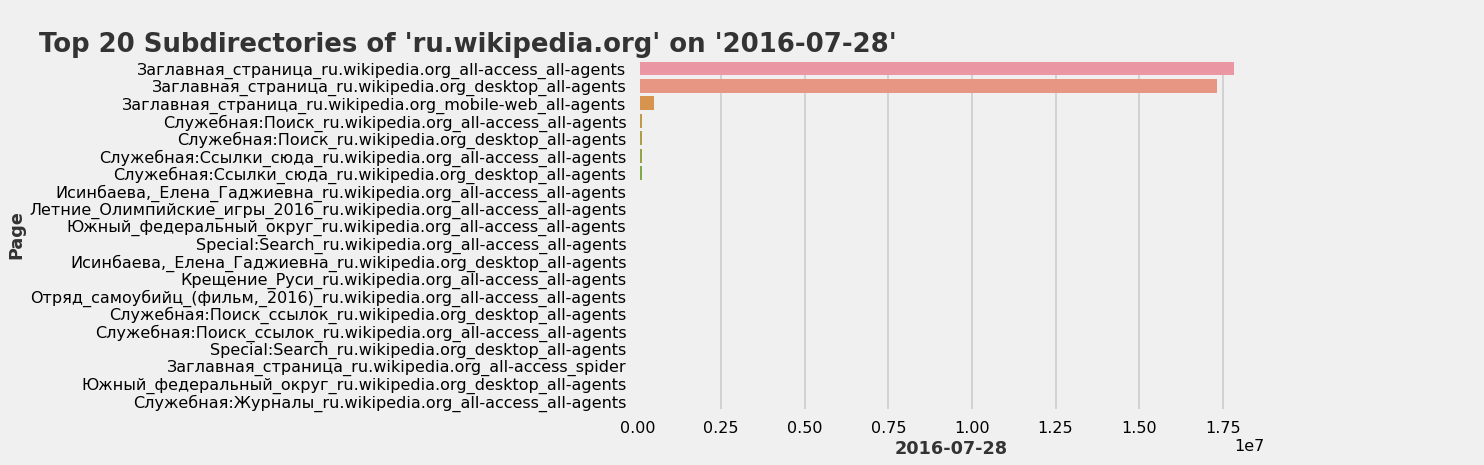

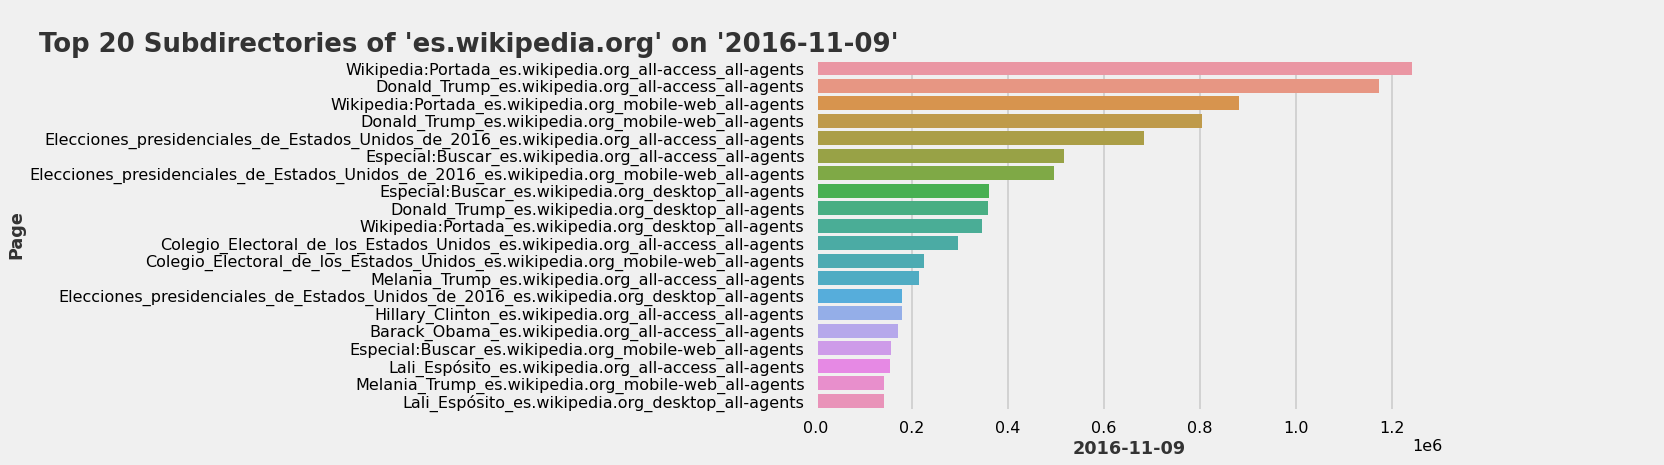

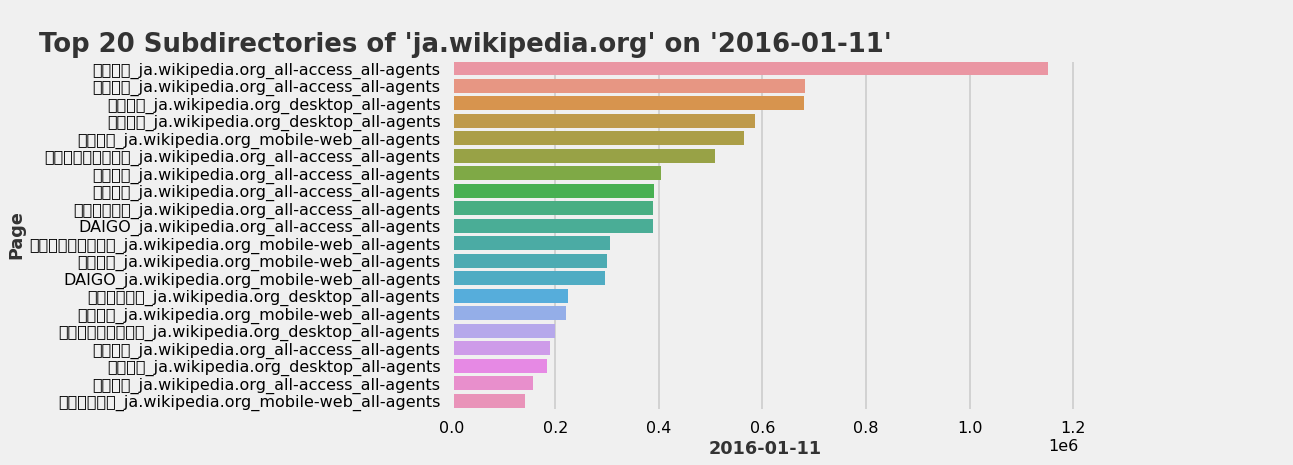

In [42]:
for i in range(len(topsites)):
    fig = plt.figure(figsize=(10,6))
    plt.text(-0.05, 1.15, f"Top 20 Subdirectories of '{top_urls[i]}' on '{days[i]}'", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
    sns.barplot(x=days[i], y=topsites[i].index, data=topsites[i]);

# **Timeseries Prediction** 
## Check Stationality
* For ARIMA time series forcasting, the time seris must be stational
* A stational time series has a mean, standard deviation, variance, and covariance that are not varying with time
* The seasonal_decompose function decomposes the timeseries by removing the trend, seasonality and residual. 
* The trend plot shows a slight value  increase as time lapses
* The seasonal plot shows a clear seasonality

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [44]:
df_index_date = df_index_date[['daily_total']]
df_index_date.head()

Page,daily_total
2015-07-01,148672476.0
2015-07-02,149593840.0
2015-07-03,141164198.0
2015-07-04,145612937.0
2015-07-05,151495372.0


<Figure size 864x1080 with 0 Axes>

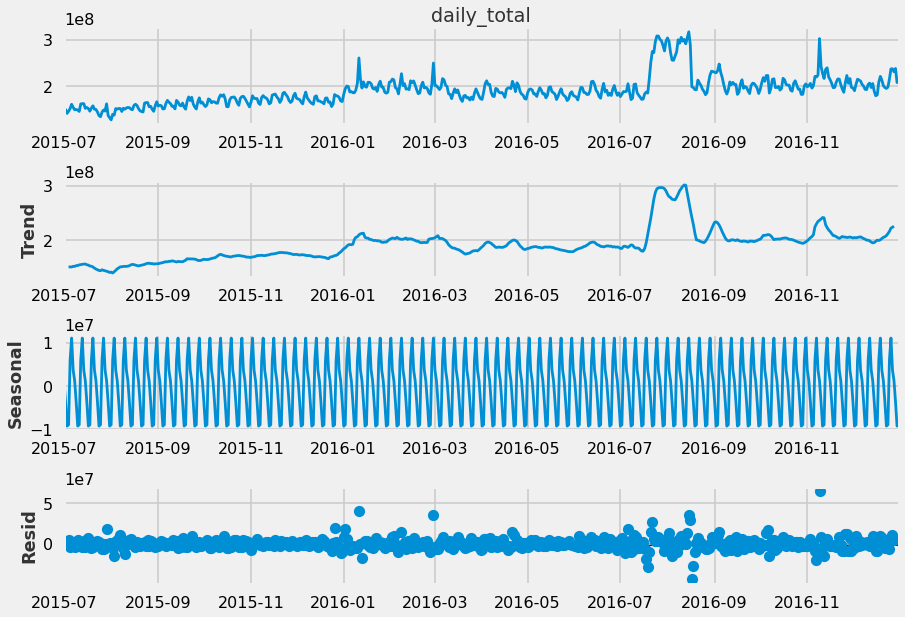

In [45]:
# Decompose the time series as an additive model into observed, trend, seasonal, and resid
fig = plt.figure(figsize=(12, 15))
dc = seasonal_decompose(df_index_date['daily_total'], model = "add")
dc.plot()
plt.ioff();

#print(dc.observed)
# print(dc.trend)
#print(dc.seasonal)
# print(dc.resid)

### **ADF (Augmented Dickey Fuller) Test**
* The result of ADF (Augmented Dickey-Fuller) test gives us the test statistics, p-value, number of lags used and 1%, 5%, 10% critical values.  
* If both test statistics < critical values AND p-value < 0.05, we can reject null hypothesis of "The data set is non-stational"
* In our ADF test, test statistics > critical values and p-value > 0.05, thus we failed to reject the null hypothis. The time series is not stational

In [46]:
# Conduct the ADF test to see whether the timeseries is stationary
# Null hypothesis: The data is non-stationary, Alternative hypothesis: The data is stationary
def adf_test(timeseries):
  print(f'Results of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[:4], 
                       index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  
  for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
    
  print(dfoutput)

In [47]:
adf_test(df_index_date['daily_total'])

Results of Dickey-Fuller Test: 
Test Statistic                  -2.436633
p-value                          0.131663
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


### **ACF and  PACF Plots**
* ACF tails off while PACF cuts off after the 1st lag, which indicates the timeseries is correlated to itself

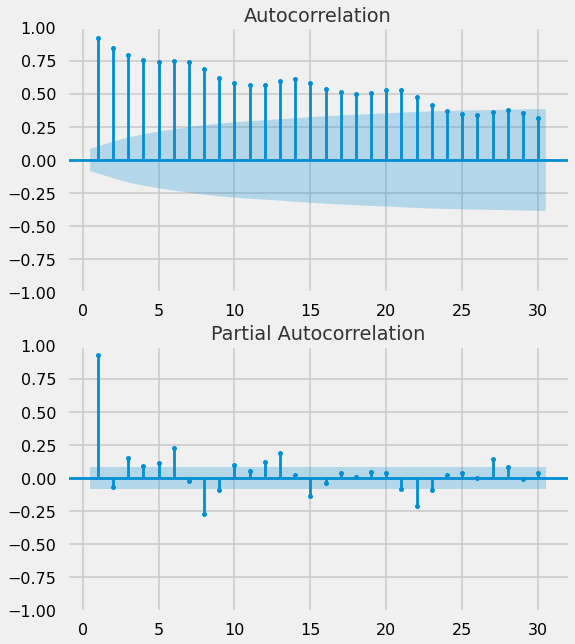

In [48]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 10))
plot_acf(df_index_date['daily_total'], zero=False, lags=30, ax=ax1)
plot_pacf(df_index_date['daily_total'], zero=False, lags=30, ax=ax2);

* The lagged data looks like a white noise
* The p-value of ADF test for the lagged data is smaller than 0.05, thus the null hypothesis can be rejected
* The timeseries is stationary after differenced

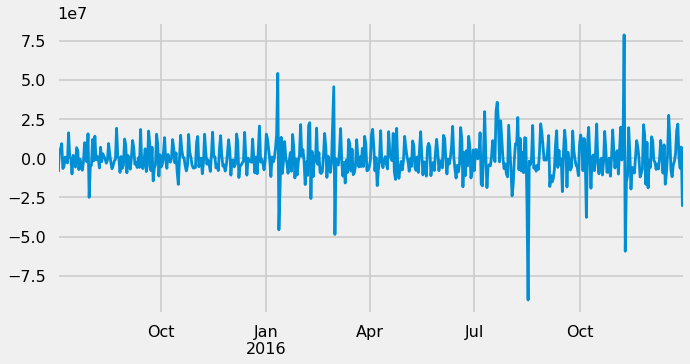

In [49]:
fig = plt.figure(figsize=(10, 5))
diff1 = df_index_date['daily_total'].diff().dropna()
diff1.plot();

* Check the ADF test against the lagged data
* Both the test statistic < critical values and p-value < 0.05. Therefore, the lagged data series is stational

In [50]:
adf_test(diff1)

Results of Dickey-Fuller Test: 
Test Statistic                -7.893705e+00
p-value                        4.367449e-12
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64


* Although ADF shows the laged dataset is stational, ACF and PACF shows some lags exceed a significant level

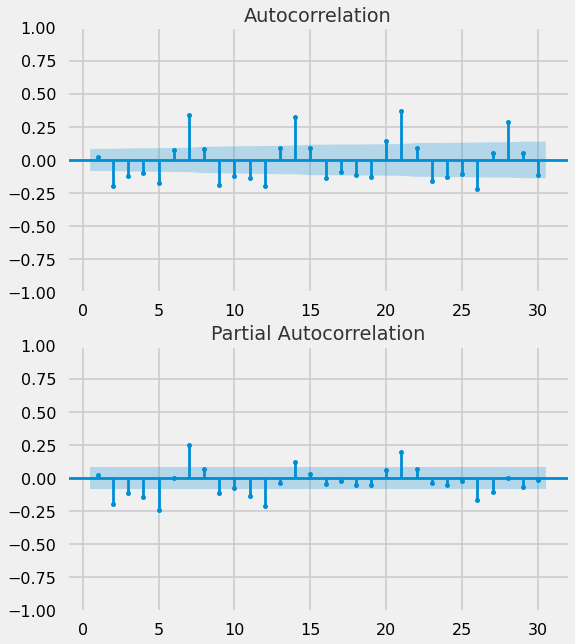

In [51]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 10))
plt.title("ACF & PACF with One Order Differencing")
plot_acf(diff1, zero=False, lags=30, ax=ax1)
plot_pacf(diff1, zero=False, lags=30, ax=ax2);

# **ARIMA Model**
## **Model Selection**
* The model that has the lowest AIC value and highest lag liklihood is the best model

In [52]:
# Create a function that creates an ARIMA models and print out the statistic value, p-value and AIC
def print_ARIMA_results(data, p, d, q):
    orders = []
    aic = []
    llf = []
    for i in range(p):
        for j in range(d):
            for k in range(q):
                results = ARIMA(data, order=(i, j, k), freq='D').fit()
                orders.append((i, j, k))
                aic.append(results.aic)
                llf.append(results.llf)
    return orders, aic, llf

In [53]:
# Go through all combination of orders pf ARIMA models
orders, aic, llf = print_ARIMA_results(df_index_date['daily_total'], 3, 3, 3)

In [54]:
# show 5 best models
arima_df = pd.DataFrame({'orders': orders, 'aic': aic, 'llf': llf})
arima_df = arima_df.sort_values(['aic', 'llf']).head()
arima_df

,orders,aic,llf
23,"(2, 1, 2)",19389.207522,-9689.603761
22,"(2, 1, 1)",19448.071511,-9720.035756
14,"(1, 1, 2)",19448.748719,-9720.374359
26,"(2, 2, 2)",19453.868951,-9721.934476
5,"(0, 1, 2)",19457.094778,-9725.547389


## **Model Evaluation**
* Split the timeseries into 70% for training and 30% for testing
* Build 5 models using the best 5 orders from the previous ARIMA model summary
* Compare R2, MSE, MAPE, and RMSE for the 5 ARIMA models
* ARIMA(1, 1, 2) model has the least RMSE ofo 50039490
* The model's MAPE is 15.28%, which means that the model is greater than 85% accurate

In [55]:
# Split the dataset into 70% and 30%
def create_train_test(data, ratio=70):
    # Split timeseries into 70:30 as train and test
    train_size = int(len(data) * ratio * 0.01)
    train, test = data[:train_size], data[train_size:]
    history = [x for x in train]
    return history, test 

# Get evaluation metrics, r2, mse, mape, and rmse
def evaluate_model(history, test, orders):
    r2 = []
    mse = []
    mape = []
    rmse = []
    predictions = []
    histories = []
    for o in range(len(orders)):
        pred = []
        for t in range(len(test)):
            model = ARIMA(history, order=orders[o]).fit()
            yhat = model.forecast()[0]
            pred.append(yhat)
            histories.append(test[t])

        r2.append(r2_score(test, pred))
        mse.append(mean_squared_error(test, pred))
        mape.append(mean_absolute_percentage_error(test, pred))
        rmse.append(np.sqrt(mean_squared_error(test, pred)))
    return predictions, histories, r2, mse, mape, rmse

In [56]:
# Evaluate the 5 models, (2, 1, 2), (2, 1, 1), (1, 1, 2), (2, 2, 2), (0, 1, 2) 
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

orders = arima_df['orders'].to_list()
predictions, histories, r2, mse, mape, rmse = evaluate_model(history, test, orders)


In [57]:
# Display the result
arima_evaluation_df = pd.DataFrame({'orders': orders, 'r2': r2, 'mse': mse, 'mape': mape, 'rmse': rmse})
arima_evaluation_df

,orders,r2,mse,mape,rmse
0,"(2, 1, 2)",-1.270771,2.746101e+15,0.160964,5.240325e+07
1,"(2, 1, 1)",-1.108475,2.549832e+15,0.149562,5.049586e+07
2,"(1, 1, 2)",-1.070535,2.503951e+15,0.146919,5.003949e+07
3,"(2, 2, 2)",-1.154973,2.606064e+15,0.152770,5.104962e+07
4,"(0, 1, 2)",-1.096118,2.534888e+15,0.148706,5.034767e+07


* The diagnostic plot shows no pattern in residual 
* The KDE plot shows a normal distribution
* The QQ plot shows the most of the data points are on the straight line
* The correlogram shows some lags exceed 95% of correlations

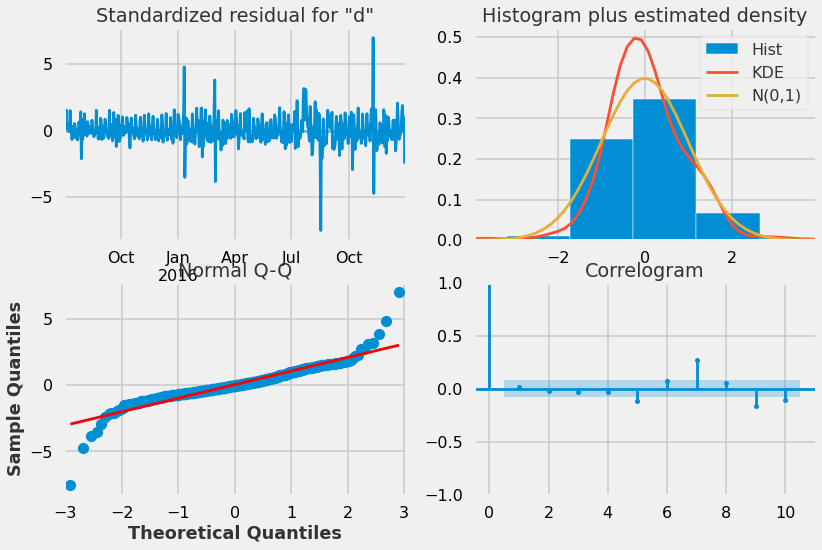

In [58]:
# Create the 4 diagnositcs plots
fig = plt.figure(figsize=(12,8))

arima_model = ARIMA(df_index_date['daily_total'], order=(1, 1, 2)).fit()
arima_model.plot_diagnostics(fig=fig)
plt.show() # Use plt.show() here explicitly to avoid creating a duplicate plot

* The model's MAPE is 0.01469 that means the model is more than 85% accurate in predictions

In [59]:
# The best model performance
print(f"----- The Best ARIMA Model -----") 
print(f"Order: {arima_evaluation_df.iloc[2, 0]}") 
print(f"Mean Squared Error: {arima_evaluation_df.iloc[2, 2]:.4f}") 
print(f"Root Mean Squared Error: {arima_evaluation_df.iloc[2, 4]:.4f}") 
print(f"Mean Absolute Percentage Error: {arima_evaluation_df.iloc[2, 3]:.2%}") 
print(f"R2 Score: {arima_evaluation_df.iloc[2, 1]:.4f}") 

----- The Best ARIMA Model -----
Order: (1, 1, 2)
Mean Squared Error: 2503950557839316.0000
Root Mean Squared Error: 50039489.9838
Mean Absolute Percentage Error: 14.69%
R2 Score: -1.0705


## **Model Visualization**
* The model prediction and the actual are very close
* The future forecast looks constant

In [60]:
# Split the dataset into training and testing
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

In [61]:
# Create ARIMA(1, 1, 2) model and predict
arima_model = ARIMA(data, order=(1, 1, 2))
result_arima = arima_model.fit()

predictions = result_arima.predict()

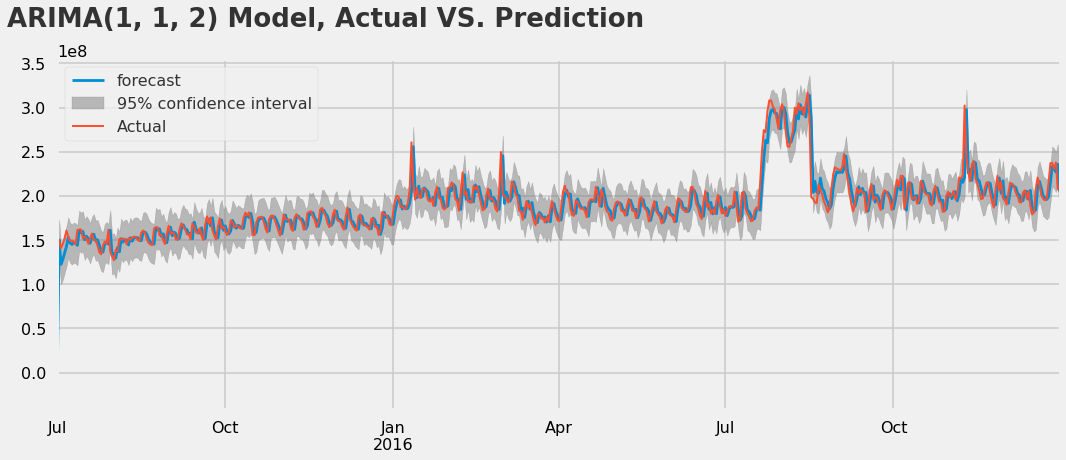

In [62]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "ARIMA(1, 1, 2) Model, Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_arima, dynamic=False, ax=ax)
sns.lineplot(data.index, data.values, ax=ax, label='Actual', lw=2)

plt.ioff();

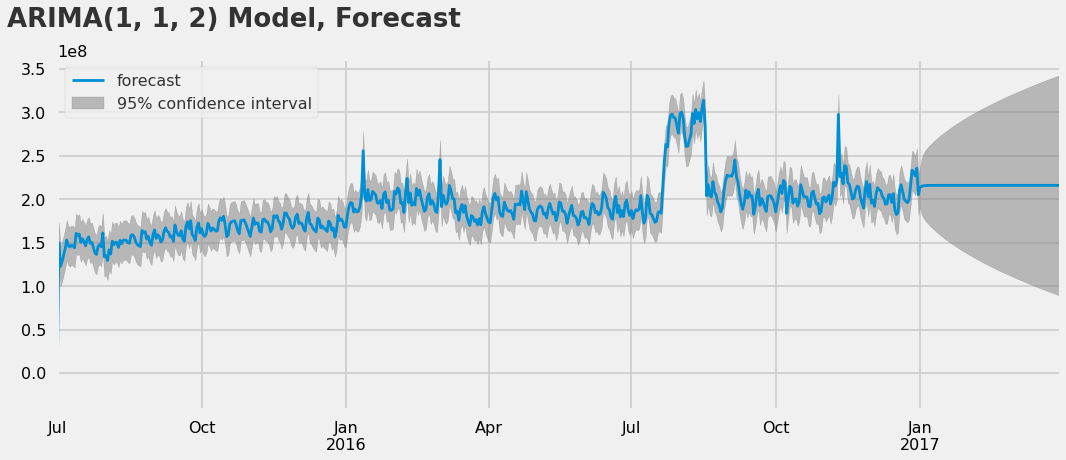

In [63]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "ARIMA(1, 1, 2) Model, Forecast", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_arima, dynamic=False, ax=ax, end='2017-03-31');

# **SARIMA Model**
## **Model Selection**
* Since the data is daily and has only 550 observations, use 7 as a seasnal argument 
* auto_arima suggested (3, 1, 2)(2, 0, 2)7

In [64]:
# Create an auto SARIMA model
auto_arima_model = auto_arima(df_index_date['daily_total'], seasonal=True, m=7)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  550
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -9652.275
Date:                           Mon, 29 May 2023   AIC                          19326.550
Time:                                   07:39:05   BIC                          19373.939
Sample:                               07-01-2015   HQIC                         19345.071
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.321e+05   7.05e-09   3.29e+13      0.000    2.32e+05    2.32e+05
ar.L1         -1.8064      0.037    -48.483      0.000      -1.879      -1.733
ar.L2         -1.1121      0.047    -23.864      0.000      -1.203      -1.021
ar.L3         -0.1043      0.029     -3.578      0.000      -0.161      -0.047
ma.L1          1.7525      0.026     68.160      0.000       1.702       1.803
ma.L2          0.9774      0.023     41.705      0.000       0.931       1.023
ar.S.L7        0.1035      0.108      0.961      0.337      -0.108       0.315
ar.S.L14       0.8590      0.102      8.387      0.000       0.658       1.060
ma.S.L7        0.0094      0.103      0.091      0.927      -0.192       0.211
ma.S.L14      -0.8501      0.083    -10.289      0.000      -1.012      -0.688
sigma2      1.323e+14   2.16e-15   6.12e+28      0.000    1.32e+14    1.32e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7726.90
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.41e+44. Standard errors may be unstable.
"""

## **Model Evaluation**
* Compare R2, MSE, MAPE, and RMSE for the 5 ARIMA models
* SARIMA(3, 1, 2)x(2, 0, 2, 7) model has the least RMSE ofo 50039490
* The model's MAPE is 12.15%, which means that the model is about 88% accurate

In [65]:
# Create SARIMA(3, 1, 2)(2, 0, 2, 7) model and predict
sarima_model = SARIMAX(data, order=(3, 1, 2), seasonal_order=(2, 0, 2, 7))
result_sarima = sarima_model.fit()
predictions = result_sarima.predict()

In [66]:
result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       daily_total   No. Observations:                  550
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -9649.436
Date:                           Mon, 29 May 2023   AIC                          19318.871
Time:                                   07:39:07   BIC                          19361.952
Sample:                               07-01-2015   HQIC                         19335.708
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0092      4.873      0.002      0.998      -9.542       9.560
ar.L2          0.8239      4.397      0.187      0.851      -7.795       9.443
ar.L3          0.0222      0.093      0.238      0.812      -0.161       0.205
ma.L1         -0.0983      4.877     -0.020      0.984      -9.658       9.461
ma.L2         -0.8805      4.813     -0.183      0.855     -10.314       8.553
ar.S.L7        0.1122      0.128      0.878      0.380      -0.138       0.363
ar.S.L14       0.8712      0.121      7.183      0.000       0.634       1.109
ma.S.L7       -0.0229      0.119     -0.193      0.847      -0.256       0.210
ma.S.L14      -0.8831      0.090     -9.786      0.000      -1.060      -0.706
sigma2      1.323e+14   5.07e-12   2.61e+25      0.000    1.32e+14    1.32e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7659.48
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+41. Standard errors may be unstable.
"""

* The diagnostic plot shows no pattern in residual 
* The KDE plot shows a normal distribution
* The QQ plot shows the most of the data points are on the straight line
* The correlogram shows all lags are within 95% of correlations

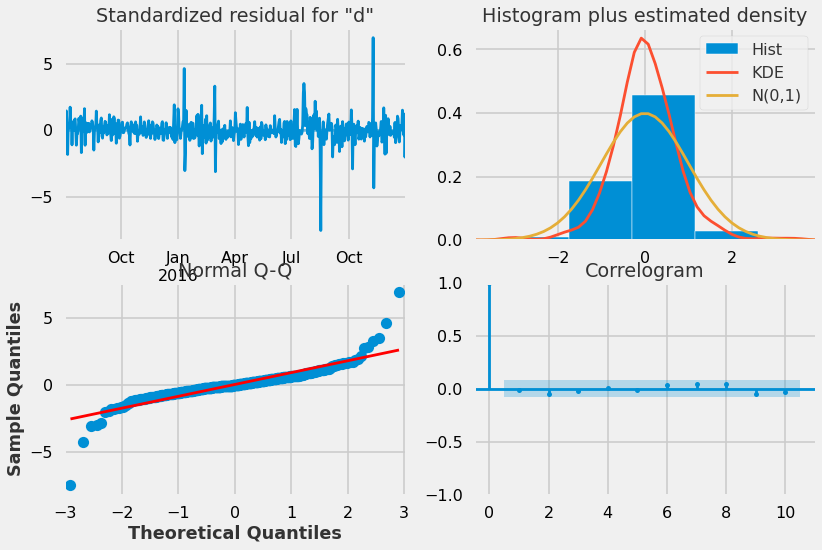

In [67]:
# Create the 4 diagnositcs plots
fig = plt.figure(figsize=(12,8))

result_sarima.plot_diagnostics(fig=fig)
plt.show() # Use plt.show() here explicitly to avoid creating a duplicate plot

In [68]:
# Split the dataset into training and testing
data = df_index_date['daily_total']
history, test = create_train_test(data, ratio=70)

In [69]:
# Get evaluation metrics, r2, mse, mape, and rmse
predictions = []
for t in range(len(test)):
    yhat = result_sarima.forecast()[0]
    predictions.append(yhat)
    histories.append(test[t])

r2 = r2_score(test, predictions)
mse = mean_squared_error(test, predictions)
mape = mean_absolute_percentage_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

In [70]:
# The best model performance
print(f"----- The Best SARIMA Model -----") 
print(f"Mean Squared Error: {mse:.4f}") 
print(f"Root Mean Squared Error: {rmse:.4f}") 
print(f"Mean Absolute Percentage Error: {mape:.2%}") 
print(f"R2 Score: {r2:.4f}") 

----- The Best SARIMA Model -----
Mean Squared Error: 1218405635936751.5000
Root Mean Squared Error: 34905667.6764
Mean Absolute Percentage Error: 12.15%
R2 Score: -0.0075


## **Model Visualization**
* The model prediction and the actual are very close
* The future forecast shows seasonality

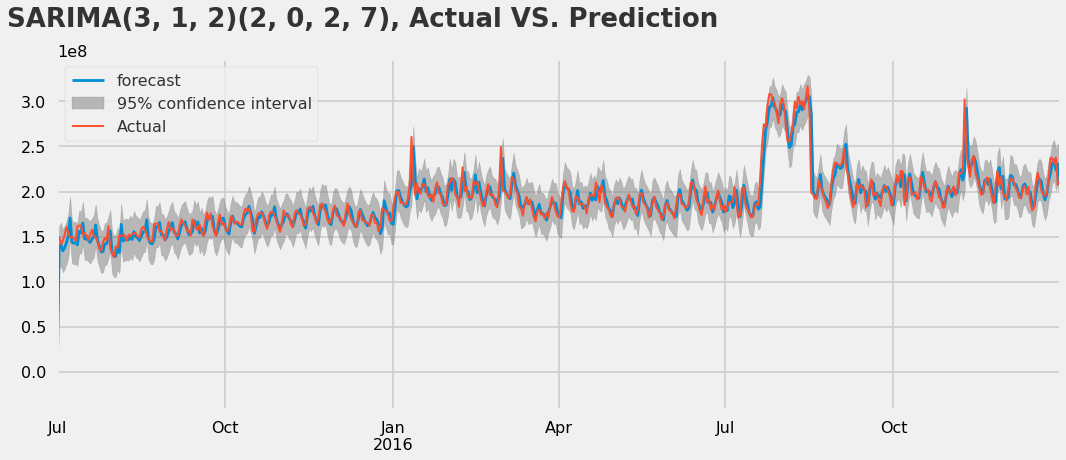

In [71]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "SARIMA(3, 1, 2)(2, 0, 2, 7), Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_sarima, dynamic=False, ax=ax)
sns.lineplot(data.index, data.values, ax=ax, label='Actual', lw=2)

plt.ioff();

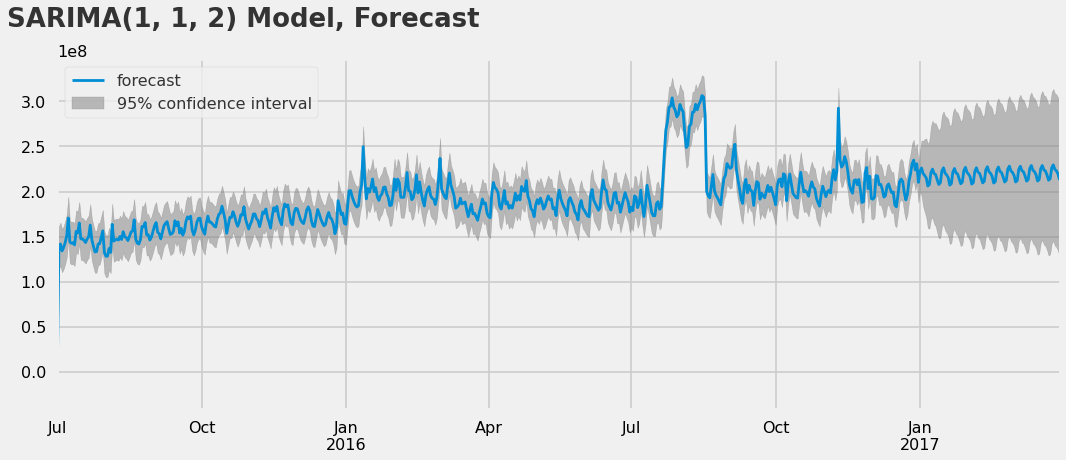

In [72]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "SARIMA(1, 1, 2) Model, Forecast", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')
plot_predict(result_sarima, dynamic=False, ax=ax, end='2017-03-31');

# **Prohet Model**
## **Model Evaluation**
* Prophet model requires 2 columns: 'ds' and 'y'
* 'ds' is a Pandas datetime variable and 'y' is a numerical variable
* Prophet model has the least RMSE ofo 51583297.5739
* The model's MAPE is 16.64%, which means that the model is greater than 83% accurate

In [73]:
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_components_plotly

In [74]:
# Prepare dataset
ds = df_index_date.index
y = df_index_date['daily_total']
df = pd.DataFrame({'ds': ds, 'y': y}).reset_index().drop('index', axis=1)

In [75]:
df.head()

,ds,y
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0


In [76]:
# Split the dataset into training and testing
train_size = int(len(df) * 70 * 0.01)
train, test = df[:train_size], df[train_size:]

In [77]:
# Build aProphet model
prophet_model = Prophet()
prophet_model.fit(train)

07:39:11 - cmdstanpy - INFO - Chain [1] start processing
07:39:11 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
#future= prophet_basic.make_future_dataframe(periods=prediction_size, freq='W')
forecast = prophet_model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-20,1.839473e+08,1.738098e+08,1.959057e+08,1.839473e+08,1.839473e+08,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,1.042014e+06,0.0,0.0,0.0,1.849893e+08
1,2016-07-21,1.838972e+08,1.693384e+08,1.914261e+08,1.838972e+08,1.838972e+08,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,-3.495200e+06,0.0,0.0,0.0,1.804020e+08
2,2016-07-22,1.838472e+08,1.653476e+08,1.863596e+08,1.838472e+08,1.838472e+08,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,-8.139635e+06,0.0,0.0,0.0,1.757076e+08
3,2016-07-23,1.837972e+08,1.648089e+08,1.863548e+08,1.837890e+08,1.838060e+08,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,-8.599789e+06,0.0,0.0,0.0,1.751974e+08
4,2016-07-24,1.837472e+08,1.782865e+08,2.000982e+08,1.837263e+08,1.837681e+08,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,5.374919e+06,0.0,0.0,0.0,1.891221e+08


In [79]:
error = (test['y'].values - forecast['yhat'].values)
mse = sum(error * error) / len(test)
rmse = mse  ** 0.5
mape = abs(error / test['y'].values).mean()

In [80]:
# The best model performance
print(f"----- The Prophet Model -----") 
print(f"Mean Squared Error: {mse:.4f}") 
print(f"Root Mean Squared Error: {rmse:.4f}") 
print(f"Mean Absolute Percentage Error: {mape:.2%}") 

----- The Prophet Model -----
Mean Squared Error: 2660836588592930.0000
Root Mean Squared Error: 51583297.5739
Mean Absolute Percentage Error: 16.64%


## **Model Visualization**
* The Prophet model's forecast shows seasonality
* The forecast is away from the actual data points.

In [81]:
train.head()

,ds,y
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0


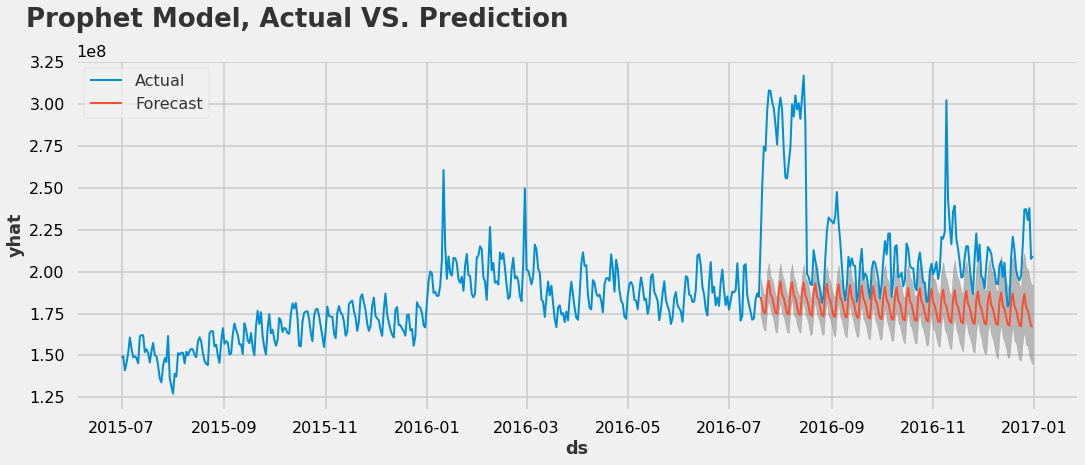

In [82]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.text(-0.05, 1.15, "Prophet Model, Actual VS. Prediction", ha='left', va='top', transform=ax.transAxes, fontsize=26, fontweight='bold')

sns.lineplot(df_index_date['daily_total'].index, df_index_date['daily_total'].values, ax=ax, label='Actual', lw=2)
sns.lineplot(forecast['ds'], forecast['yhat'], ax=ax, label='Forecast', lw=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5)
plt.ioff();

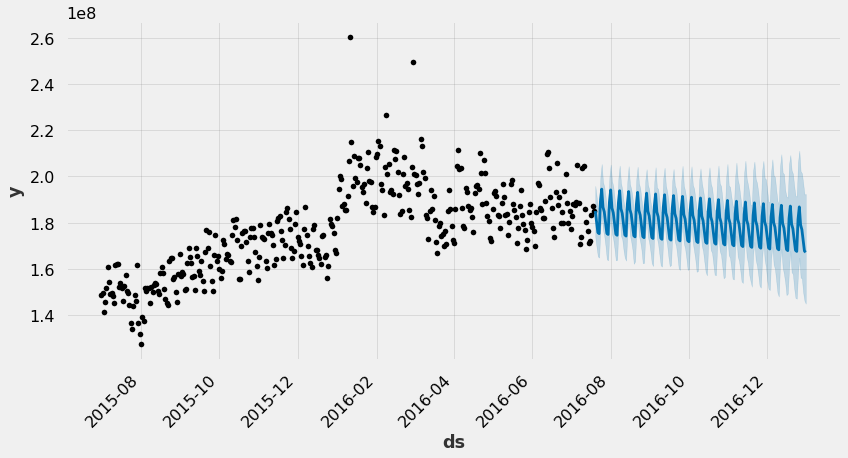

In [83]:
figure, ax = plt.subplots(figsize=(12, 6))
fig1 = prophet_model.plot(forecast, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

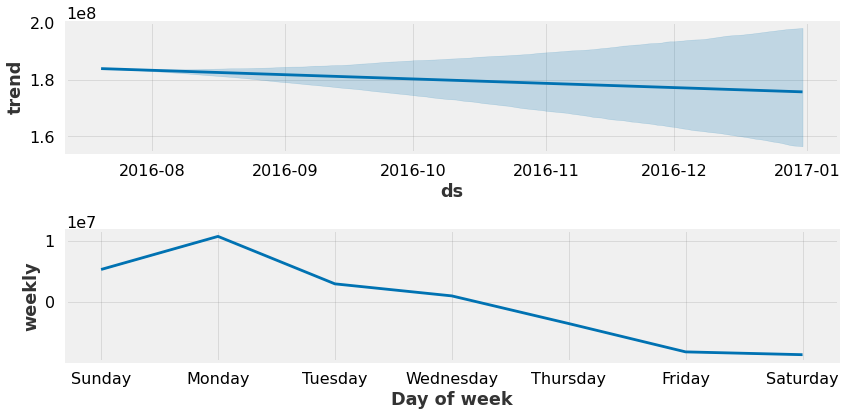

In [84]:
fig1 = prophet_model.plot_components(forecast, figsize=(12, 6))

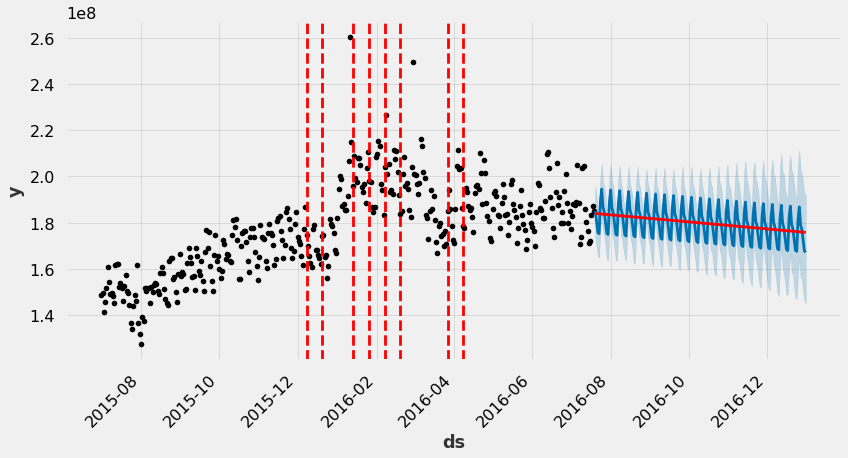

In [85]:
figure, ax = plt.subplots(figsize=(12, 6))
fig = prophet_model.plot(forecast, ax=ax)
a = add_changepoints_to_plot(fig.gca(), prophet_model, forecast)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [86]:
# Check the dates where the changepoints occured 
prophet_model.changepoints

12    2015-07-13
25    2015-07-26
37    2015-08-07
49    2015-08-19
61    2015-08-31
74    2015-09-13
86    2015-09-25
98    2015-10-07
111   2015-10-20
123   2015-11-01
135   2015-11-13
147   2015-11-25
160   2015-12-08
172   2015-12-20
184   2016-01-01
196   2016-01-13
209   2016-01-26
221   2016-02-07
233   2016-02-19
246   2016-03-03
258   2016-03-15
270   2016-03-27
282   2016-04-08
295   2016-04-21
307   2016-05-03
Name: ds, dtype: datetime64[ns]

# **Linear Regression Models**
## **Feature Engineering**  
* Create a new variable extracted from the "Page" column and predict access with a linear regression mode
* Sum up each page's access  
* Add new columns, 'year', 'month' and 'weekday' to the dataset  
* Subtract the previous day's access to create a lag  
* Standardize continuous variables  
* One-hot encode the categorical variables 

In [87]:
daily_total = daily_access_by_url_t.sum(axis=1)
daily_access_by_url_t['daily_total'] = daily_total

In [88]:
# Extract year, montha and weekday
year = [t.strftime("%Y") for t in daily_access_by_url_t.index]
month = [t.strftime("%m") for t in daily_access_by_url_t.index]
weekday = [t.strftime("%A") for t in daily_access_by_url_t.index]
daily_access_by_url_t['year'] = year
daily_access_by_url_t['month'] = month
daily_access_by_url_t['weekday'] = weekday

In [89]:
# For the URL columns, get the difference by taking the previous day's access
df_ohe1 = daily_access_by_url_t.iloc[:, :-4].diff()
# # Standardize 
for col in df_ohe1:
    df_ohe1[col] = (df_ohe1[col] - df_ohe1[col].mean()) / df_ohe1[col].std()

# One-hot encoding 'year', 'month', and 'weekday'
df_ohe2 = pd.get_dummies(daily_access_by_url_t.iloc[:, -3:])

# Standardize 'daily_total'
df_ohe3 = (daily_access_by_url_t['daily_total'] - daily_access_by_url_t['daily_total'].mean()) / daily_access_by_url_t['daily_total'].std()

# Concatenate df_ohe1 and df_ohe2
df_ohe = pd.concat([df_ohe1, df_ohe2, df_ohe3], axis="columns")
df_ohe = df_ohe[1:]
df_ohe.head()

,commons.wikimedia.org,de.wikipedia.org,en.wikipedia.org,es.wikipedia.org,fr.wikipedia.org,ja.wikipedia.org,ru.wikipedia.org,www.mediawiki.org,zh.wikipedia.org,year_2015,year_2016,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,daily_total
2015-07-02,0.090205,-0.128644,-0.041332,-0.311070,0.046324,0.963871,0.086319,0.192610,0.004278,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-1.278319
2015-07-03,-0.075052,-0.366602,-0.520874,-0.541320,-0.315824,-0.743669,-0.391070,-0.329908,-0.059067,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,-1.545015
2015-07-04,-0.512177,-0.716620,0.386856,-0.377731,0.530313,1.738050,-0.295407,-0.096831,0.067355,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-1.404266
2015-07-05,0.266968,1.286148,0.319667,0.516123,-0.156641,-0.362279,0.296161,0.168523,0.514400,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-1.218159
2015-07-06,0.382341,0.925964,0.784596,0.892897,0.336046,-1.072201,0.375941,0.303118,0.035834,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.925608


<AxesSubplot: title={'center': 'Distribution of Target Variable'}, xlabel='daily_total', ylabel='Density'>

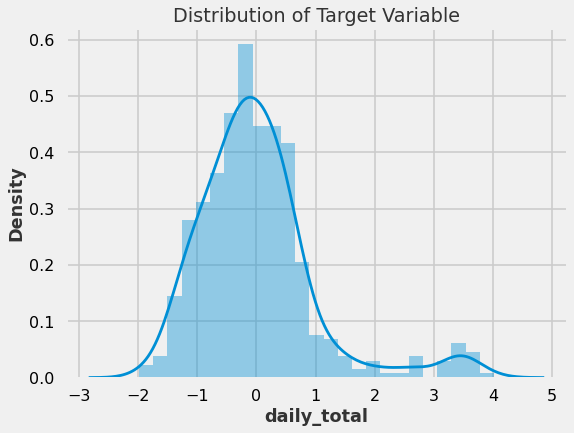

In [90]:
# Plot the distribution of 'daily_total'
plt.figure(figsize=(8, 6))
plt.title("Distribution of Target Variable")

sns.distplot(df_ohe['daily_total'])

* The target variable, 'daily_total' is highly positively correlated to 'year_2016' while highly negatively correlated to 'year_2015'
* 'de.wikipedia.org' and 'weekday_Sunday' has a positive correlation
* 'ru.wikipedia.org' and 'en.wikipedia.org' has a positive correlation

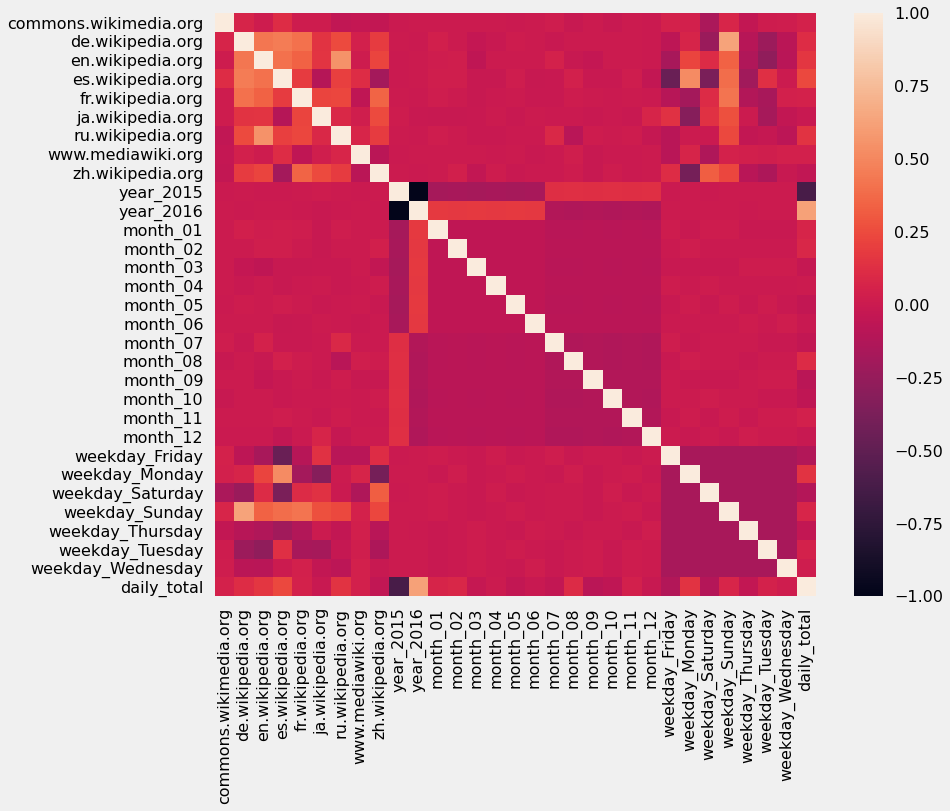

In [91]:
# Plot correlation od df_ohe
fig = plt.figure(figsize=(12, 10))
corr = df_ohe.corr()
sns.heatmap(corr);

## **Model Creation**

* Create linear regression, RandomForestRegressor, and XGBRegressor models
* Evaluate models using R2, RMSE, MSE MAPE and MAE
* The RandomForestRegressor model has the best R2 score and smallest RMSE, and MSE

In [92]:
# Create a Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import tree

In [93]:
# Create X_train, y_train, X_test, and y_test
X = df_ohe.drop('daily_total', axis=1)
y = df_ohe['daily_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=327)

In [94]:
# Linear Regression model
pipe0 = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe0.fit(X_train, y_train)
y_pred0 = pipe0.predict(X_test)

In [95]:
# Get MSE, RMSE, MAR, MAPE and R2 score
def get_evaluation_metrics(test, pred):
    metrics = {}
    metrics['Mean Squared Error'] = mean_squared_error(test, pred)
    metrics['Root Mean Squared Error'] = mean_squared_error(test, pred) ** (1/2)
    metrics['Mean Absolute Error'] = mean_absolute_error(test, pred)
    metrics['Mean Absolute Percent Error'] = mean_absolute_error(test, pred)
    metrics['R2 Score'] = r2_score(test, pred)
    return metrics

def print_metrics(metrics):
    for k, v in metrics.items():
        print(f'{k}: {v:.4f}')

In [96]:
# RandomForestRegressor model
pipe1 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
len(rf.estimators_)

100

In [98]:
rf.estimators_[0].tree_.max_depth

24

In [99]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

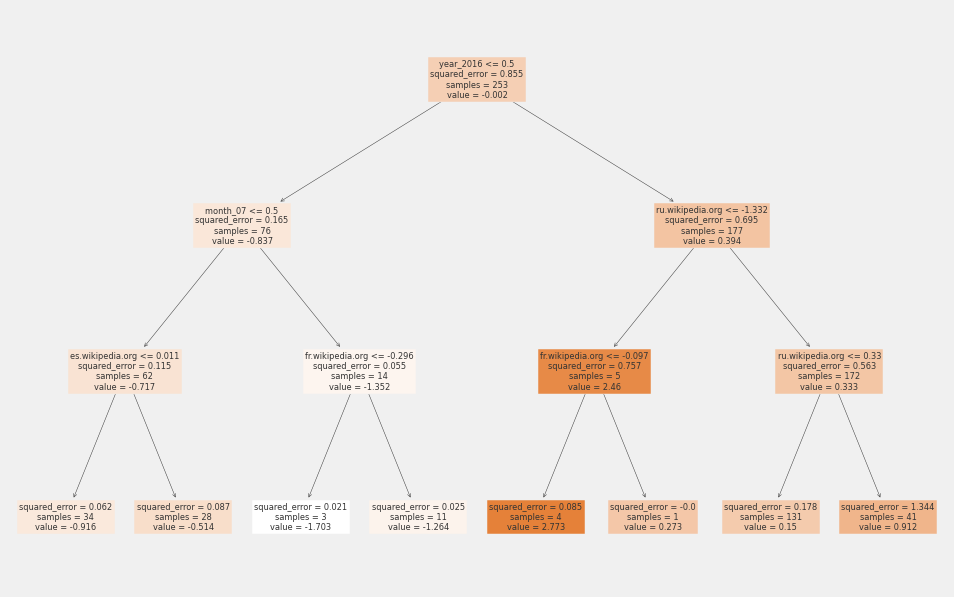

In [100]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)

In [101]:
# XGBRegressor model
pipe2 = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

In [102]:
# Print the top 5 features
pd.DataFrame(pipe2['xgb'].feature_importances_, index=X_train.columns, 
             columns=['Feature Importances']).sort_values(by='Feature Importances', ascending=False).head()

,Feature Importances
year_2015,0.517159
month_08,0.177741
ru.wikipedia.org,0.045329
month_01,0.037526
month_07,0.030202


## **Model Evaluation**
* The XGBRegressor model has the least RMSE of 0.601300 among the linear models
* The XGBRegressor's MAPE is 0.343677, which means the model is 65% accurate

In [103]:
print("----- Linear Regression Model -----")
metrics0 = get_evaluation_metrics(y_test, y_pred0)
print_metrics(metrics0)

----- Linear Regression Model -----
Mean Squared Error: 0.4108
Root Mean Squared Error: 0.6409
Mean Absolute Error: 0.4154
Mean Absolute Percent Error: 0.4154
R2 Score: 0.5986


In [104]:
print("----- RandomForestRegressor Model -----")
metrics1 = get_evaluation_metrics(y_test, y_pred1)
print_metrics(metrics1)

----- RandomForestRegressor Model -----
Mean Squared Error: 0.3611
Root Mean Squared Error: 0.6009
Mean Absolute Error: 0.3608
Mean Absolute Percent Error: 0.3608
R2 Score: 0.6472


In [105]:
print("----- XGBRegressor Model -----")
metrics2 = get_evaluation_metrics(y_test, y_pred2)
print_metrics(metrics2)

----- XGBRegressor Model -----
Mean Squared Error: 0.3616
Root Mean Squared Error: 0.6013
Mean Absolute Error: 0.3437
Mean Absolute Percent Error: 0.3437
R2 Score: 0.6467


In [106]:
linear_models = ['Linear Regression', 'RandomForestRegressor', 'XGBRegressor']
metrics = [metrics0, metrics1, metrics2]
metrics_df = pd.DataFrame(metrics, index=linear_models)
metrics_df

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percent Error,R2 Score
Linear Regression,0.410764,0.640909,0.415381,0.415381,0.598599
RandomForestRegressor,0.361066,0.600887,0.360798,0.360798,0.647165
XGBRegressor,0.361562,0.601300,0.343677,0.343677,0.646680


## **Model Visualization**
* Linear regression models prediction plot shows the models capture the trend 
* The XGBRegressor model captures the spikes occured in July through August in 2016.

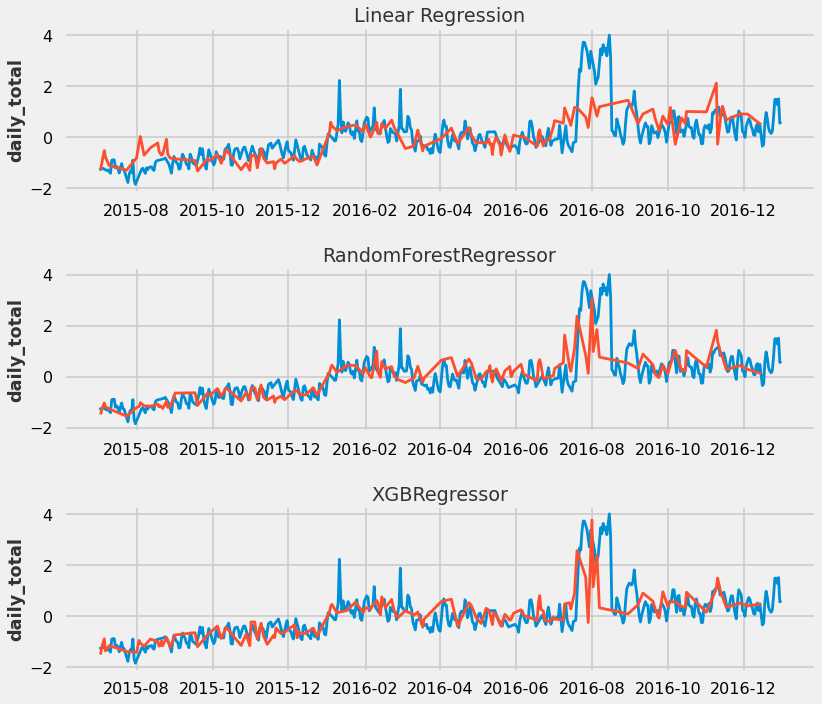

In [107]:
predictions = [y_pred0, y_pred1, y_pred2]
fig = plt.figure(figsize=(12, 10))
fig.tight_layout(pad=10.0)

for i in range(len(linear_models)):
    fig.tight_layout(pad=2.0)
    ax = plt.subplot(3, 1, i+1, sharex=ax )
    plt.title(linear_models[i])
    sns.lineplot(X_train.index, y_train)
    sns.lineplot(X_test.index, predictions[i])

# **Conclusion**
* The evaluation metrics of the ARIMA, SARIMA, and Prophet models are better than the linear regression models.
* Especially, the SARIMA model has the highest MAPE of 12.15%, which means the model predicts 87.85% accurate.